Text(0.5, 1.0, 'Velocity vs Time')

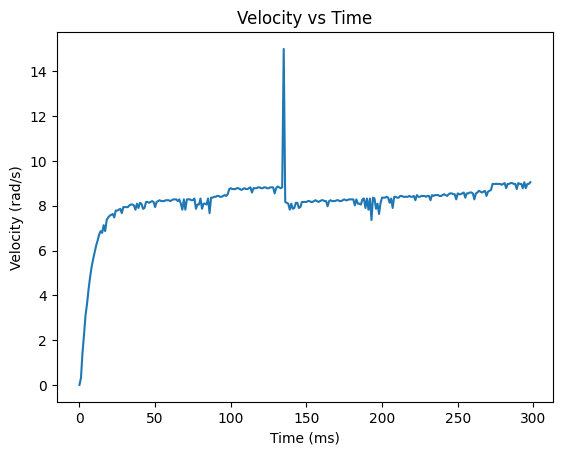

In [1]:
from time import time
from matplotlib.scale import LogScale
import pandas as pd
import matplotlib.pyplot as plt
import math
import serial
import numpy as np



#ser = serial.Serial('COM5', 115200, timeout = 0.018, parity = serial.PARITY_EVEN, rtscts = 1)
#step response data collection
vel = []
pos = []
#ser.flush()

with serial.Serial('COM11',baudrate = 115200) as ser:
    while(True):
        try:
            buf = ser.readline()
            if buf != b'' and len(pos) < 300:
                try:
                    new_list = buf.decode().strip().split(',')
                    pos.append(new_list[0])
                    vel.append(new_list[1])
                except:
                    print('problemo')
            elif len(pos) >= 299:
                print('Pos', pos)
                print('Velocity', vel)
                ser.close()
                break
            if len(pos) >= 299:
                break
        except KeyboardInterrupt:
            ser.close()
            break
       
tout = list(range(0, len(pos)))

vel_int= len(vel)*[0]

for i in range(len(vel_int)):
    vel_int[i] = float(vel[i])
    if(vel_int[i] > 15):
        vel_int[i] = 15
   

plt.plot(tout, vel_int)
plt.ylabel('Velocity (rad/s)')
plt.xlabel('Time (ms)')
plt.title('Velocity vs Time')